In [4]:
import os
import json

with open('kaggle.json') as file:
    f = json.loads(file.read())
    os.environ['KAGGLE_USERNAME'] = f['username']
    os.environ['KAGGLE_KEY'] = f['key']
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from enum import Enum
from typing import Dict
from numbers import Number
import datetime

# Урок 4

## Задача 1

Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы

### 1.1. Скачать данные

In [ ]:
#https://www.kaggle.com/datasets/esratmaria/house-price-dataset-with-other-information

In [2]:
dataset_name = 'esratmaria/house-price-dataset-with-other-information'

In [5]:
api.dataset_list_files(dataset_name).files

[kc_house_data.csv]

In [6]:
kaggle.api.dataset_download_files(dataset_name, path='.', unzip=True)

In [7]:
df_house = pd.read_csv([e.name for e in api.dataset_list_files(dataset_name).files if e.name.split('.')[-1] == 'csv'][0], encoding='latin-1', index_col=0)
df_house.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df_house.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
df_house.isnull().sum() 

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
df_house.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [30]:
df_house['date'] = pd.to_datetime(df_house['date'])

In [33]:
df_house['month'] = df_house['date'].dt.month

In [45]:
df_house['year'] = df_house['date'].dt.year

In [50]:
df_house['week'] = df_house['date'].dt.isocalendar().week

### 1.2 Изучите стоимости недвижимости

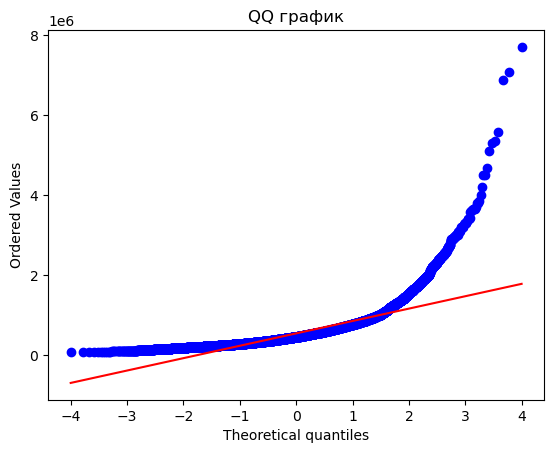

In [85]:
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(df_house['price'], dist="norm", plot=pylab)
pylab.title("QQ график")
pylab.show()

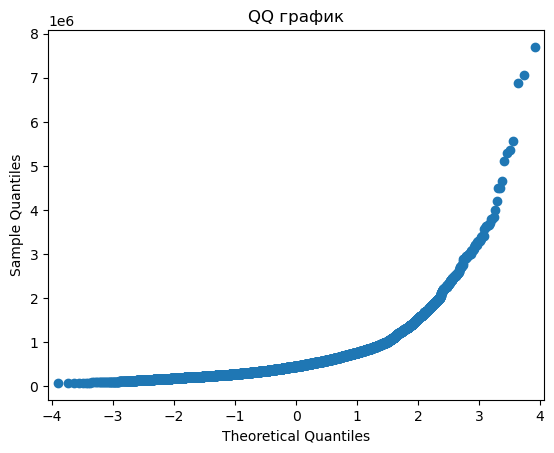

In [86]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig = sm.qqplot(df_house['price'])
plt.title("QQ график")
plt.show()

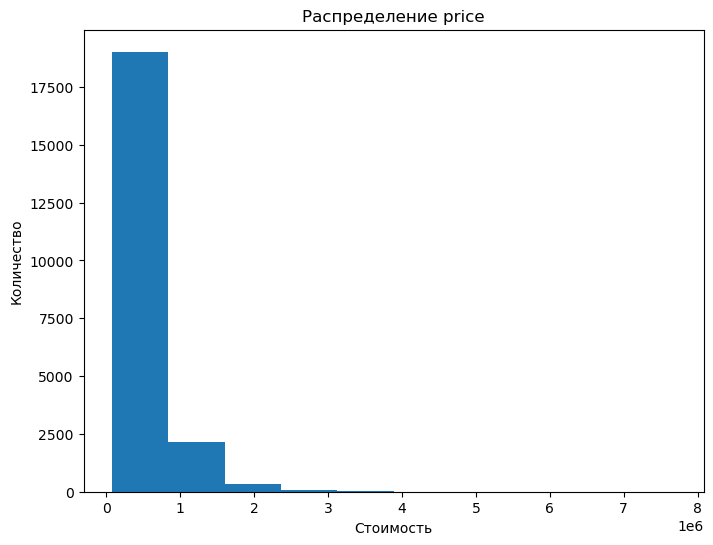

In [97]:
plt.figure(figsize=(8, 6))
plt.hist(df_house['price'])
plt.title('Распределение price')
plt.xlabel('Стоимость')
plt.ylabel('Количество');

In [88]:
y = df_house['price'].to_numpy()
y = np.sort(y)
x= [e for e in range(len(y))]

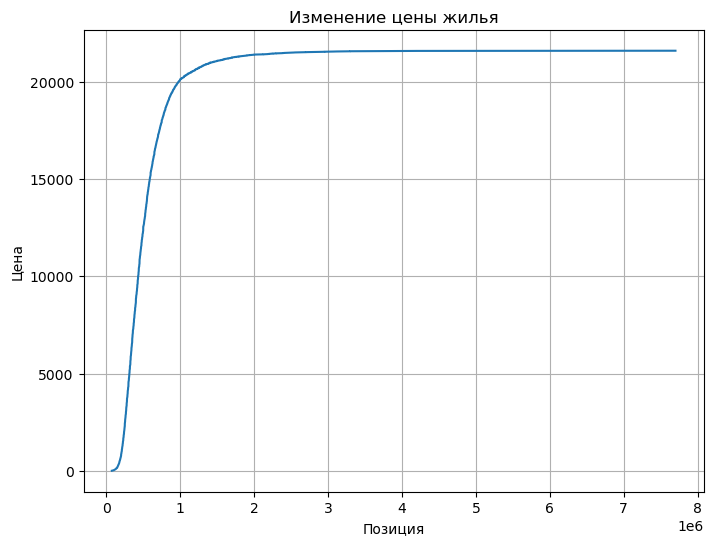

In [90]:
plt.figure(figsize=(8, 6))
plt.plot(y, x)
plt.ylabel('Цена')
plt.xlabel('Позиция')
plt.title('Изменение цены жилья')
plt.grid();


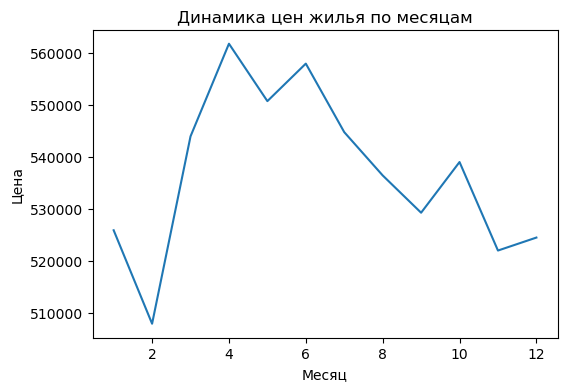

In [54]:
plt.figure(figsize=(6, 4))

plt.plot(df_house.groupby(['month']).agg({"price":['mean']}))

plt.title('Динамика цен жилья по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Цена');

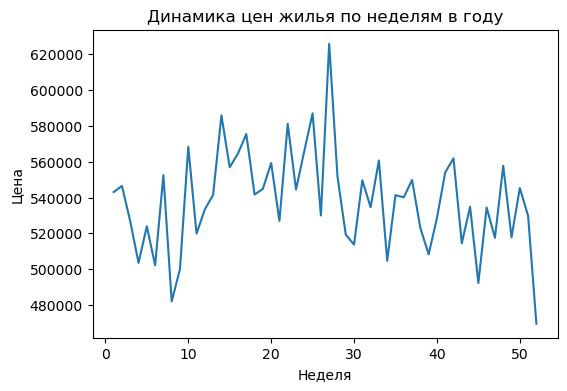

In [55]:
plt.figure(figsize=(6, 4))

plt.plot(df_house.groupby(['week']).agg({"price":['mean']}))

plt.title('Динамика цен жилья по неделям в году')
plt.xlabel('Неделя')
plt.ylabel('Цена');

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

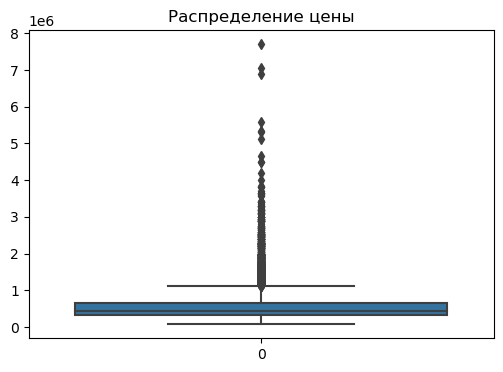

In [92]:
plt.figure(figsize=(6, 4))

sns.boxplot(data=[df_house['price']])
plt.title("Распределение цены")
plt.show();

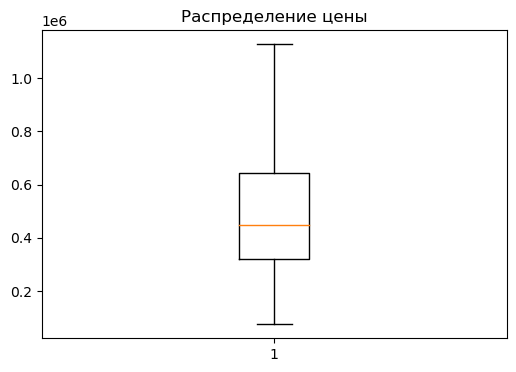

In [93]:
plt.figure(figsize=(6, 4))

plt.boxplot([df_house['price']], showfliers=False)
plt.title("Распределение цены")
plt.show();

Вывод: Лучше покупать перед или после нового года.

### 1.3 Изучите распределение квадратуры жилой

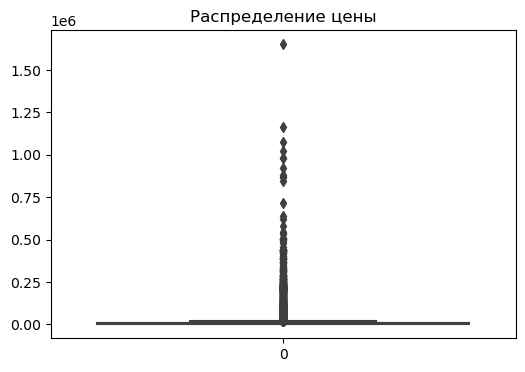

In [106]:
plt.figure(figsize=(6, 4))

sns.boxplot(data=[df_house['sqft_lot']])
plt.title("Распределение цены")
plt.show();

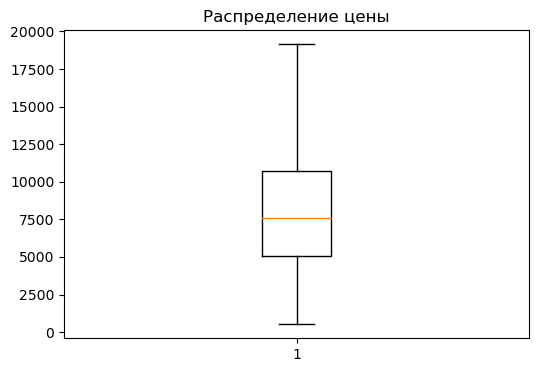

In [107]:
plt.figure(figsize=(6, 4))

plt.boxplot([df_house['sqft_lot']], showfliers=False)
plt.title("Распределение цены")
plt.show();

In [ ]:
view

In [130]:
vw = df_house.groupby(['view']).agg({"sqft_lot":["mean"]})
vw['view'] = vw.index

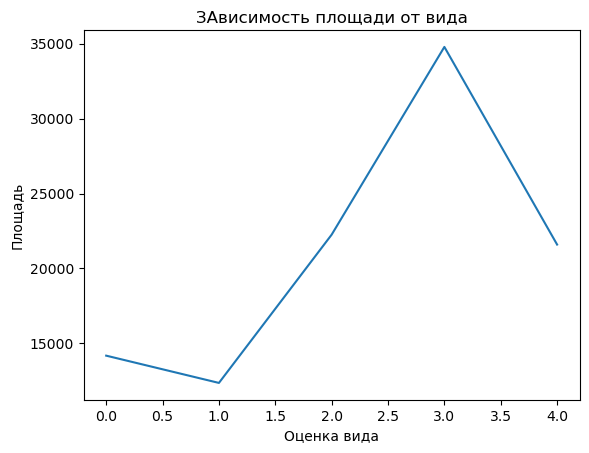

In [131]:
plt.plot(vw.to_numpy()[:,1], vw.to_numpy()[:,0])
plt.title("ЗАвисимость площади от вида")
plt.xlabel("Оценка вида")
plt.ylabel("Площадь")
plt.show();

In [122]:
df_house = df_house.drop_duplicates()

In [124]:
df_house.index

Int64Index([7129300520, 6414100192, 5631500400, 2487200875, 1954400510,
            7237550310, 1321400060, 2008000270, 2414600126, 3793500160,
            ...
            7852140040, 9834201367, 3448900210, 7936000429, 2997800021,
             263000018, 6600060120, 1523300141,  291310100, 1523300157],
           dtype='int64', name='id', length=21613)

In [125]:
df_house['sqft_lot']

id
7129300520     5650
6414100192     7242
5631500400    10000
2487200875     5000
1954400510     8080
              ...  
263000018      1131
6600060120     5813
1523300141     1350
291310100      2388
1523300157     1076
Name: sqft_lot, Length: 21613, dtype: int64

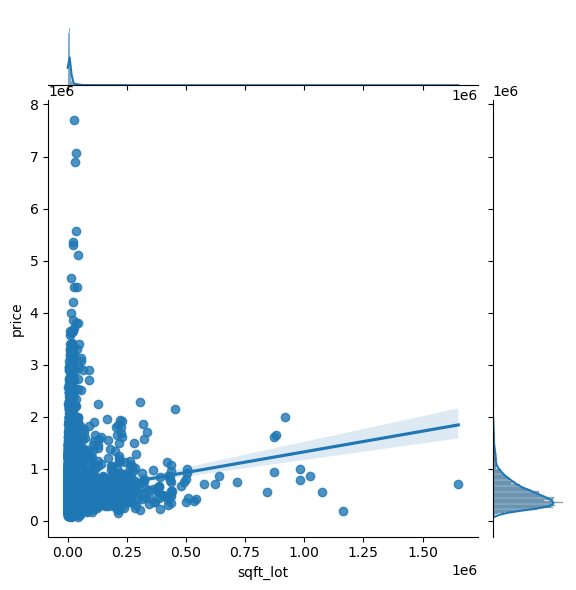

In [126]:
sns.jointplot(x=df_house['sqft_lot'].reset_index(drop=True), y=df_house['price'].reset_index(drop=True), kind='reg');

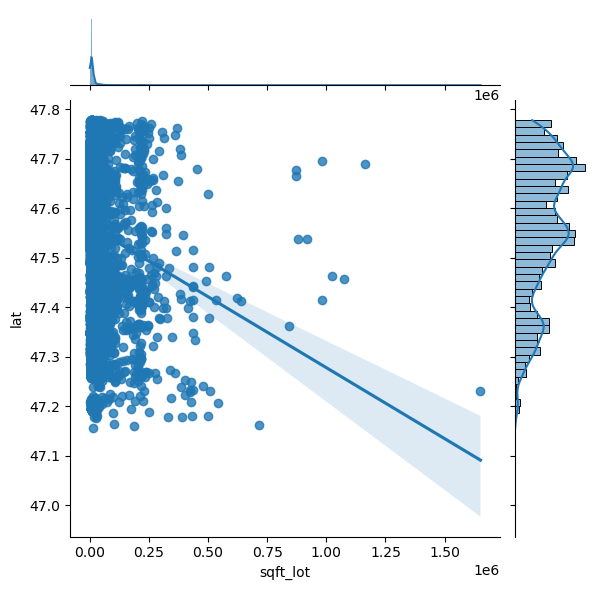

In [127]:
sns.jointplot(x=df_house['sqft_lot'].reset_index(drop=True), y=df_house['lat'].reset_index(drop=True), kind='reg');

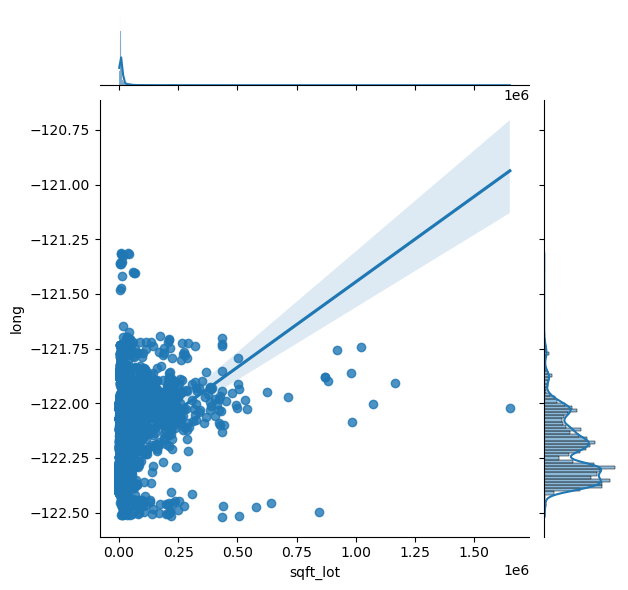

In [128]:
sns.jointplot(x=df_house['sqft_lot'].reset_index(drop=True), y=df_house['long'].reset_index(drop=True), kind='reg');

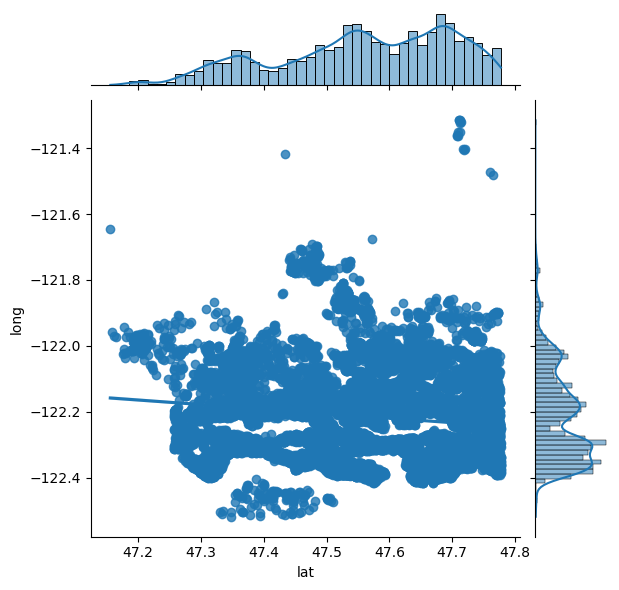

In [129]:
sns.jointplot(x=df_house['lat'].reset_index(drop=True), y=df_house['long'].reset_index(drop=True), kind='reg');

Вывод: от рвсположения есть влияние на стоимость и есть несколько распределений по долготе

### 1.4 Изучите распределение года постройки

In [72]:
yr_blt = df_house.groupby(['yr_built']).agg({"yr_built":["count"]})

In [75]:
yr_blt['cnt'] = yr_blt.index

In [79]:
np.shape(yr_blt.to_numpy())

(116, 2)

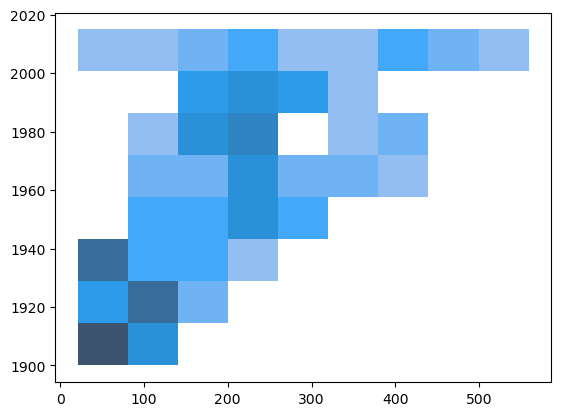

In [82]:
sns.histplot(x=yr_blt.to_numpy()[:,0], y=yr_blt.to_numpy()[:,1]);

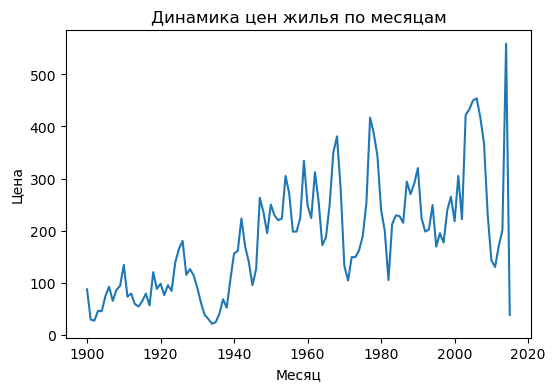

In [83]:
plt.figure(figsize=(6, 4))

plt.plot(df_house.groupby(['yr_built']).agg({"yr_built":["count"]}))

plt.title('Динамика цен жилья по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Цена');

Вывод: Заметна тенденция к увеличению постройи количества домов. Также видны просадки в кризисные годы.

## Задача 2

### 2.1 Изучите распределение домов от наличия вида на набережную

Постройте график

Сделайте выводы

In [134]:
np.unique(df_house['waterfront'])

array([0, 1])

In [135]:
df0 = df_house.loc[df_house['waterfront'] == 0]
df1 = df_house.loc[df_house['waterfront'] == 1]

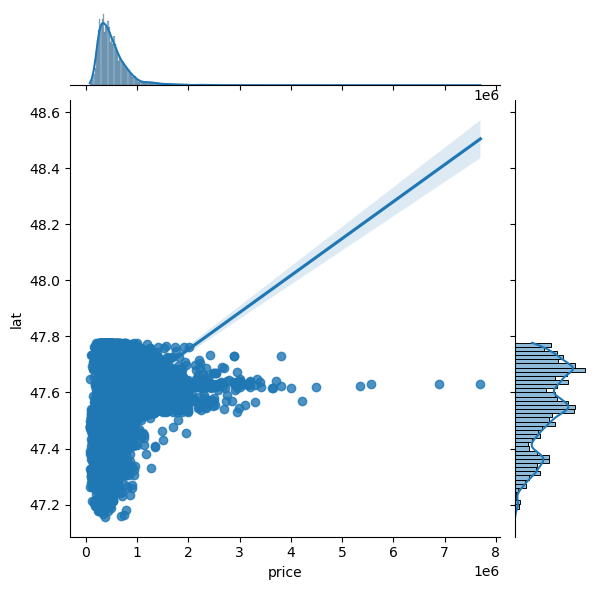

In [138]:
sns.jointplot(x=df0['price'].reset_index(drop=True), y=df0['lat'].reset_index(drop=True), kind='reg');

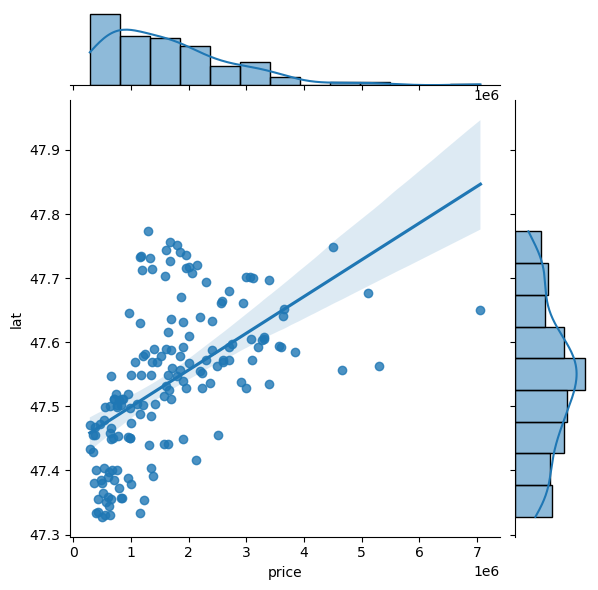

In [139]:
sns.jointplot(x=df1['price'].reset_index(drop=True), y=df1['lat'].reset_index(drop=True), kind='reg');

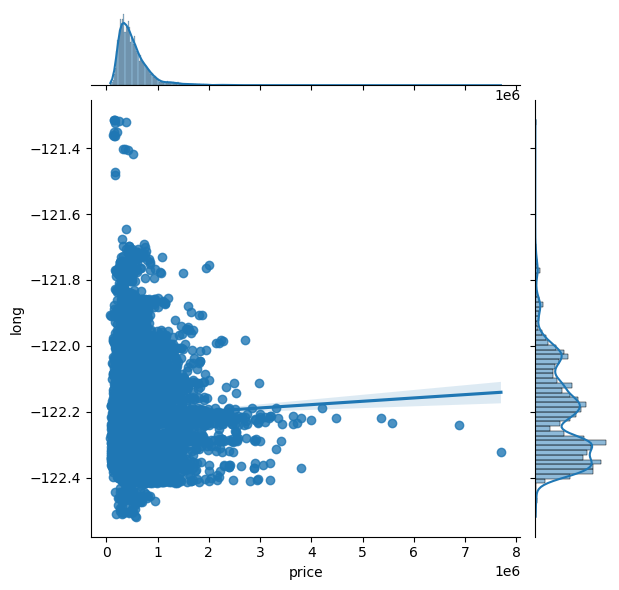

In [140]:
sns.jointplot(x=df0['price'].reset_index(drop=True), y=df0['long'].reset_index(drop=True), kind='reg');

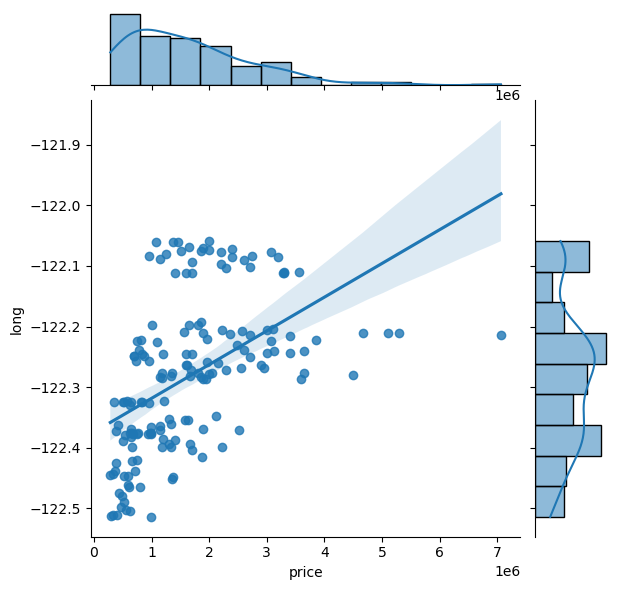

In [141]:
sns.jointplot(x=df1['price'].reset_index(drop=True), y=df1['long'].reset_index(drop=True), kind='reg');

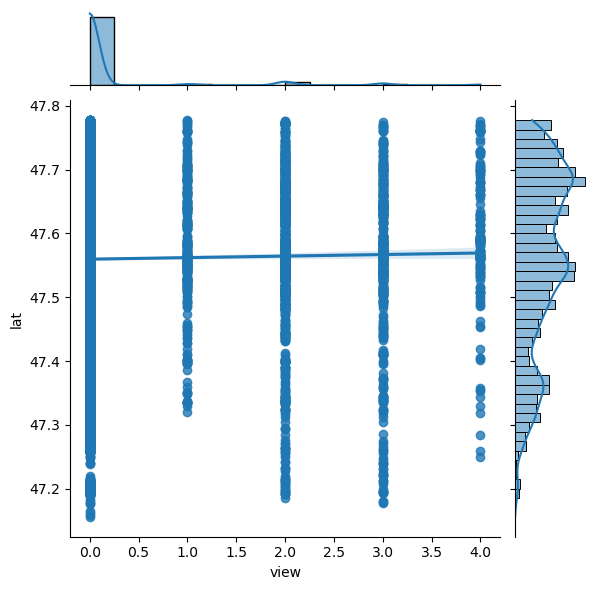

In [143]:
sns.jointplot(x=df0['view'].reset_index(drop=True), y=df0['lat'].reset_index(drop=True), kind='reg');

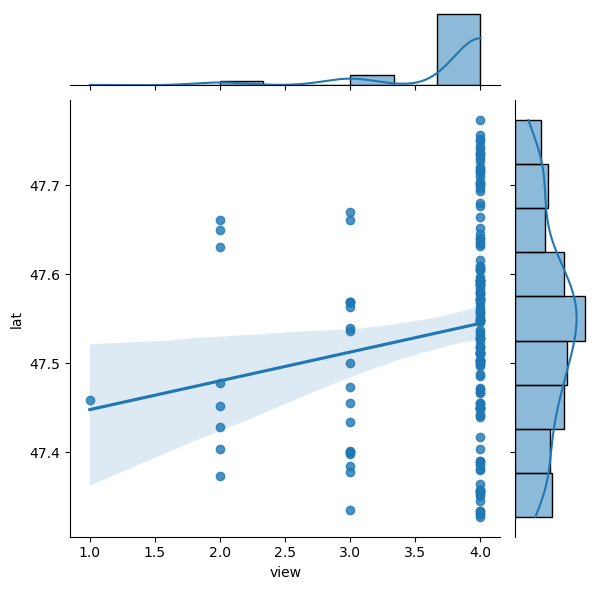

In [144]:
sns.jointplot(x=df1['view'].reset_index(drop=True), y=df1['lat'].reset_index(drop=True), kind='reg');

In [145]:
np.min(df0['price']), np.max(df0['price']), np.mean(df0['price']), np.median(df0['price'])

(75000.0, 7700000.0, 531563.5998135199, 450000.0)

In [146]:
np.min(df1['price']), np.max(df1['price']), np.mean(df1['price']), np.median(df1['price'])

(285000.0, 7062500.0, 1661876.0245398772, 1400000.0)

Вывод: На набережной лучше вид из окна и цены дороже.

### 2.2 Изучите распределение этажей домов

In [147]:
df_house.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year', 'weak', 'week'],
      dtype='object')

In [148]:
df_house['floors']

id
7129300520    1.0
6414100192    2.0
5631500400    1.0
2487200875    1.0
1954400510    1.0
             ... 
263000018     3.0
6600060120    2.0
1523300141    2.0
291310100     2.0
1523300157    2.0
Name: floors, Length: 21613, dtype: float64

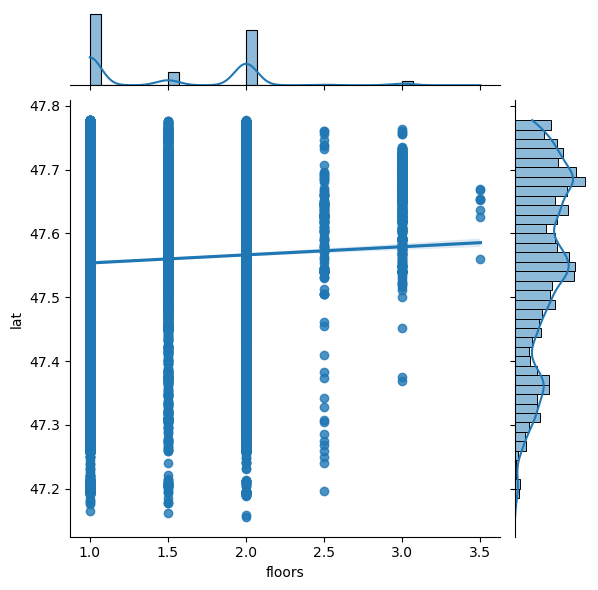

In [149]:
sns.jointplot(x=df_house['floors'].reset_index(drop=True), y=df_house['lat'].reset_index(drop=True), kind='reg');

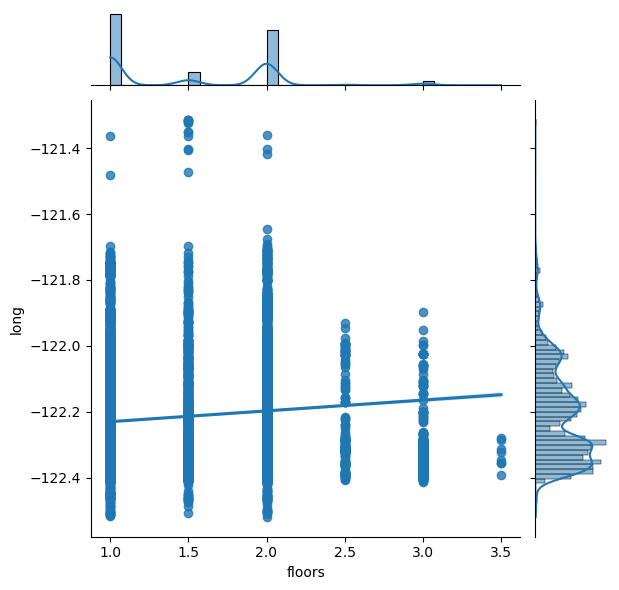

In [150]:
sns.jointplot(x=df_house['floors'].reset_index(drop=True), y=df_house['long'].reset_index(drop=True), kind='reg');

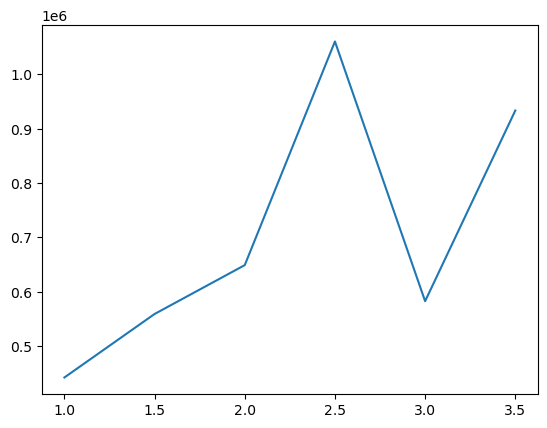

In [162]:
plt.plot(df_house.groupby(["floors"]).agg({"price":['mean']}));

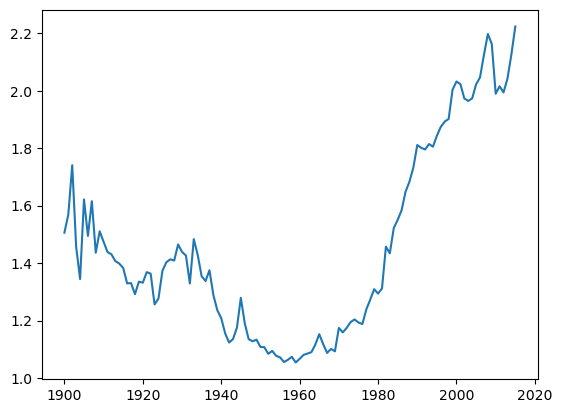

In [155]:
plt.plot(df_house.groupby(["yr_built"]).agg({"floors":['mean']}));

 Вывод: С 1900 была тенденция строить меньшей этажность, но с 60-х появилась тенденция к увеличению этажности. Зависимость цены от этажности тоже просматривается.Возможно с 1900 старались экономить до 60-х и возможно пока не сменилось поколение.

### 2.3 Изучите распределение состояния домов

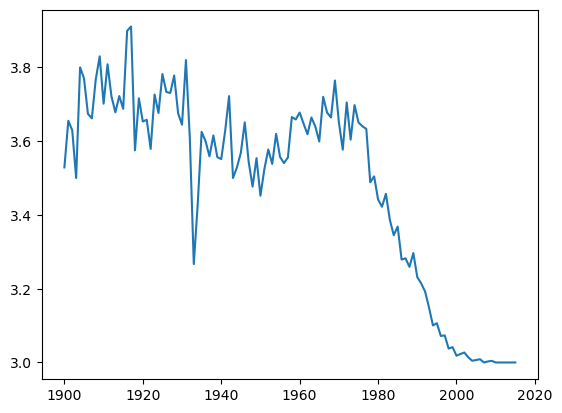

In [156]:
plt.plot(df_house.groupby(["yr_built"]).agg({"condition":['mean']}))

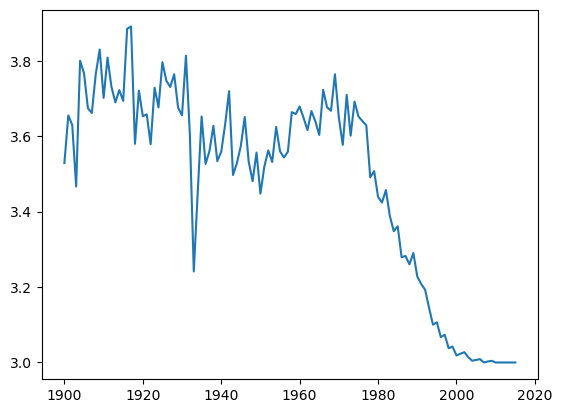

In [158]:
plt.plot(df0.groupby(["yr_built"]).agg({"condition":['mean']}))

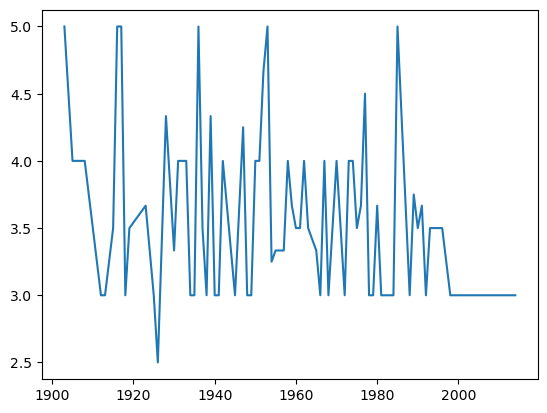

In [157]:
plt.plot(df1.groupby(["yr_built"]).agg({"condition":['mean']}))

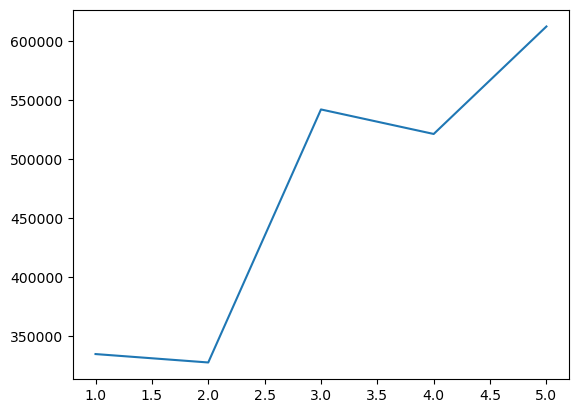

In [161]:
plt.plot(df_house.groupby(["condition"]).agg({"price":['mean']}));

Вывод: С 70-х перестали обслуживать здания или экономили во время строительства здания (это так инициатива Рейгана так повлияла???) или население очень быстро увеличилось (Хотя беби бумеры с середины 80-х) или молодеж не бережет дома. На набережной в очень хорошем состоянии часть зданий (Тк видна просадка во время великой депрессии). Возможно все вместе. Также есть зависимость стоимости от состояния дома.

# Задача 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [172]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipco

In [173]:
df_num_features = df_house.select_dtypes(include=['int64', 'float64', 'float32', 'float16'])
df_num_features.drop('price', axis=1, inplace=True)

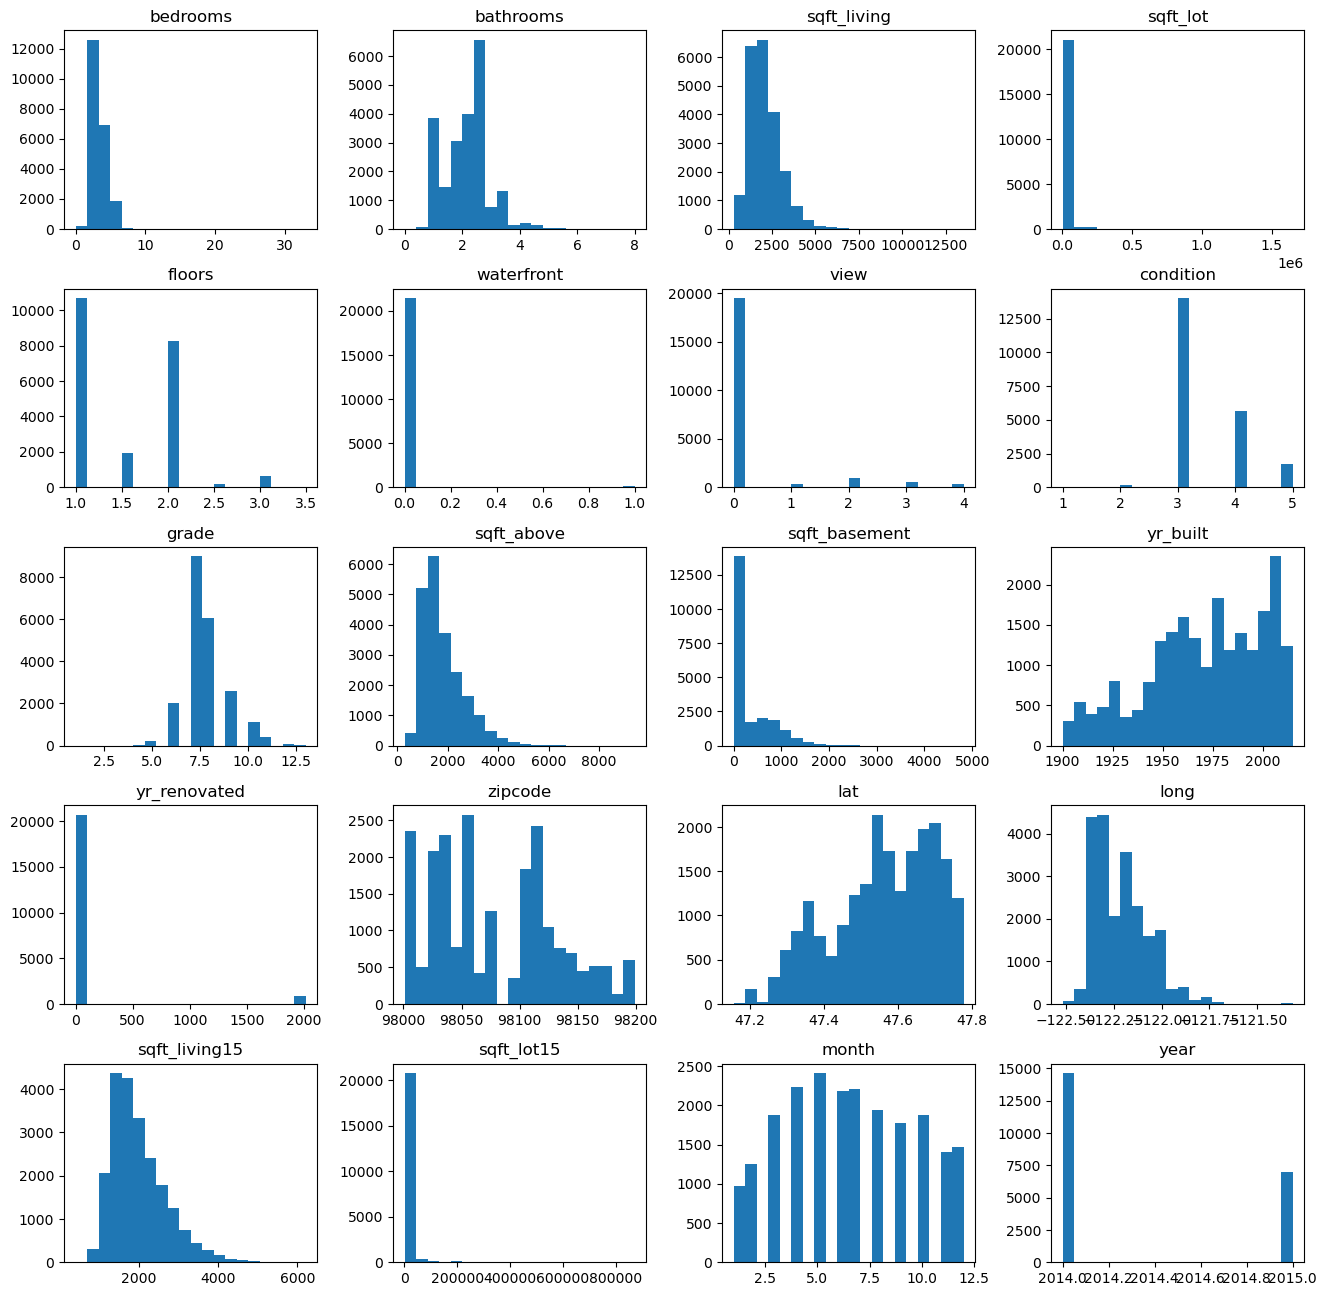

In [175]:
df_num_features.reset_index(drop=True).hist(figsize=(16, 16), bins=20, grid=False);

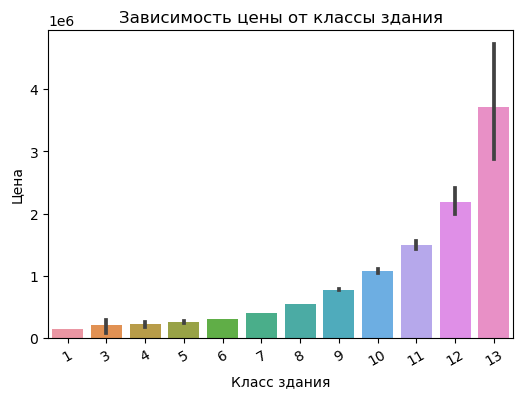

In [179]:
plt.figure(figsize=(6, 4))

sns.barplot(x=df_house['grade'], y=df_house['price'])

plt.title('Зависимость цены от классы здания')
plt.xlabel('Класс здания')
plt.ylabel('Цена')
plt.xticks(rotation=30)
plt.show();

Цена зависит от класса здания.

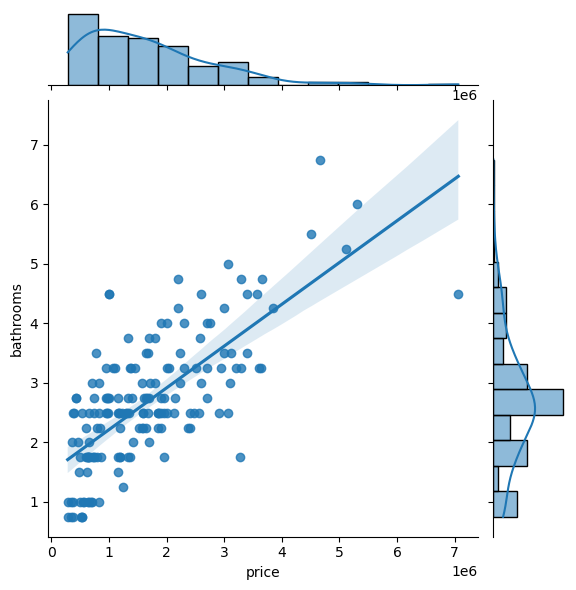

In [180]:
sns.jointplot(x=df1['price'].reset_index(drop=True), y=df1['bathrooms'].reset_index(drop=True), kind='reg');

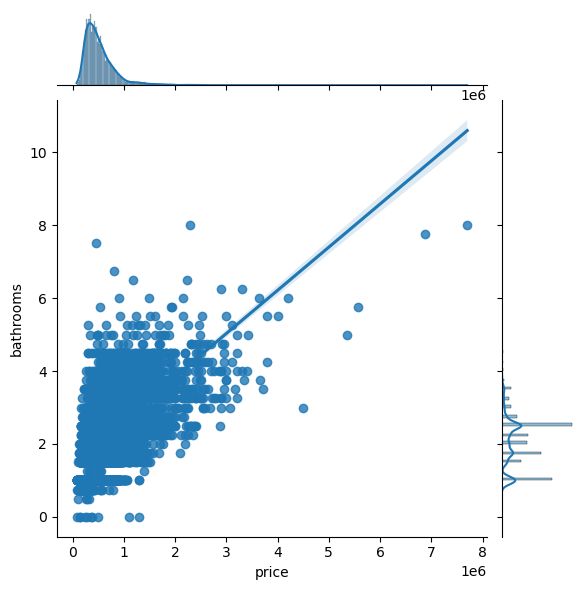

In [181]:
sns.jointplot(x=df0['price'].reset_index(drop=True), y=df0['bathrooms'].reset_index(drop=True), kind='reg');

In [182]:
np.min(df0['bathrooms']), np.max(df0['bathrooms']), np.mean(df0['bathrooms'])

(0.0, 8.0, 2.1104778554778556)

In [183]:
np.min(df1['bathrooms']), np.max(df1['bathrooms']), np.mean(df1['bathrooms'])

(0.75, 6.75, 2.6779141104294477)

Если дом около набережной то у него больше количества ванных комнат.

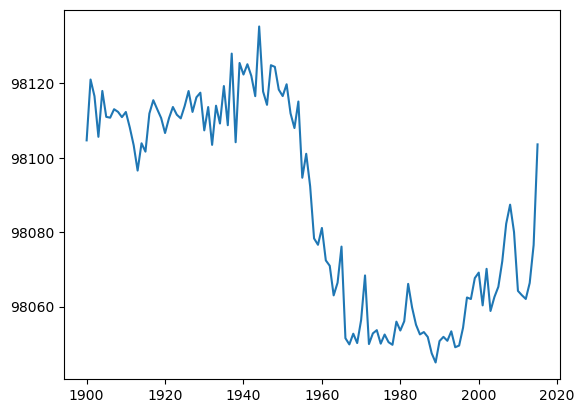

In [184]:
plt.plot(df_house.groupby(["yr_built"]).agg({"zipcode":['mean']}))

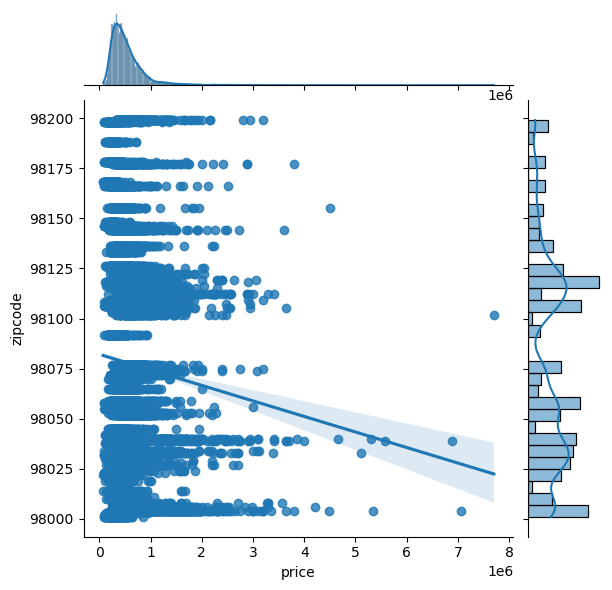

In [185]:
sns.jointplot(x=df_house['price'].reset_index(drop=True), y=df_house['zipcode'].reset_index(drop=True), kind='reg');

C 50-х почтовый адрес начал уменьшатся. Возможно в то время начали сносили старые дома. 

In [207]:
df_house["is_renovated"] =  (df_house["yr_renovated"] > 0).astype(int)
#df_house["is_renovated_n"] =  df_house["yr_renovated"] > 0

In [208]:
np.unique(df_house["is_renovated"])

array([0, 1])

In [209]:
data = pd.crosstab(df_house['price'], df_house['is_renovated']).reset_index().sort_values(by=0, ascending=False)

In [210]:
data

is_renovated,price,0,1
1113,350000.0,169,3
1683,450000.0,162,10
958,325000.0,147,1
1541,425000.0,147,3
1923,500000.0,146,6
...,...,...,...
3689,1362500.0,0,1
197,185850.0,0,1
3506,1084500.0,0,1
3904,2027000.0,0,1


In [214]:
# Готовим данные для графика
data = pd.crosstab(df_house['yr_built'], df_house['is_renovated']).reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

is_renovated,yr_built,no,yes
114,2014,559,0
106,2006,454,0
105,2005,450,0
104,2004,433,0
103,2003,421,1


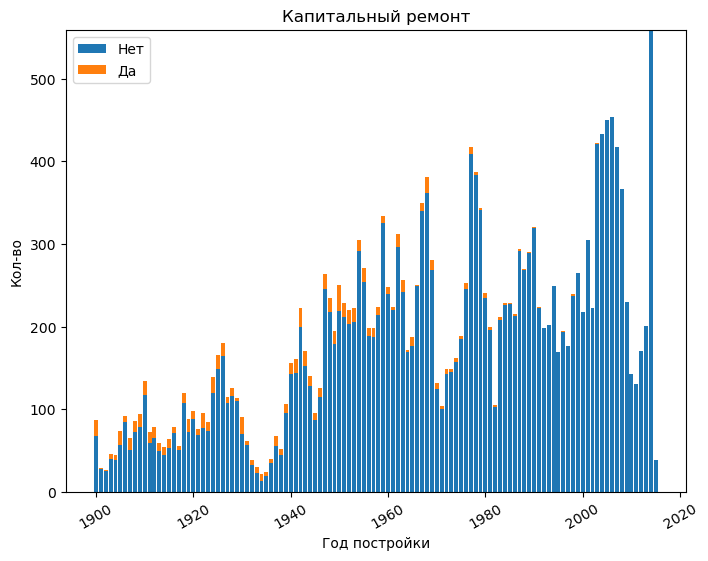

In [217]:
# Строим столбчатую многорядную сложенную диаграмму

plt.figure(figsize=(8, 6))

plt.bar(data['yr_built'], data['no'])
plt.bar(data['yr_built'], data['yes'], bottom=data['no'])


plt.title('Капитальный ремонт')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во')
plt.legend(['Нет', 'Да'])
plt.xticks(rotation = 30);

У старых домов проводят капитальных ремонт. 